### **4. Feature Engineering(타겟중점) 전체**


- **데이터 로드 및 전체데이터**
    - 나이가 20~40세인 전체 데이터 확인
    - 타겟나이와 이상치 제거시 전체 200,000개 -> 약 150,000개
- **단위 변환**
    - `height` fit -> cm
    - `weight` lbs -> kg
- **결측치 처리** 
    - 숫자형: 평균값 (몸무게는 사이즈별 평균값)
    - 범주형: 최빈값
- **이상치 제거**
    - `height`, `weight`, `size`의 상위 1% 이상치 제거
- **나이 그룹화**
    - `age`, 쇼핑몰 타겟 대상인 20-30대 -> 4개 그룹화
- **전처리 및 가중치 적용**
    - 숫자형 데이터: 스케일링
    - 범주형 데이터: 원-핫 인코딩 후, 가중치 부여(각 범주형 피처-도메인 개수만큼 나누기, 합은 1)
- **t-SNE 차원 축소**: 데이터를 2D로 축소하여 시각화
- **엘보우 그래프**: K-Means 클러스터링으로 최적의 클러스터 수 찾기 -> k=6
- **결과**
    - 약 15만개의 대용량 데이터(논문 등) 실루엣 점수 0.3~4 정도 양호하다 판단
    - t-SNE 시각화 확인시 군집 명확함
    - 실루엣 점수는 다소 낮을수 있으나 유의미한 수준의 결과로 판단
- **PCA 시각화**
    - 평행한 3개 층(layer) 구조가 명확:  size(사이즈), weight_kg(몸무게), height_cm(키) 등 신체지표의 조합에 따른 그룹
    - 각 층 내부에서 클러스터가 색상별로 분포하며, 각 층은 서로 겹치지 않고 분리
     - 데이터의 전역적(전체적) 분포가 "계층적으로" 구성
     - 군집 간의 "경계"는 크지만, 완벽히 분리된 집합은 아님(각 층 안에서도 군집별 색상이 섞임)
     - **결과**: 동일한 체형 그룹(층) 내에서 다양한 나이대가 혼합되어 있음
     - **분산 비율**: PC1 41.3%, PC2 17.2% -> 누적 58.4%, 유의미한 결과
     - **주성분 계수**:
         - PC1: size(0.839), weight_kg(0.453), height_cm(0.273)
         -      사이즈 영향 큼: 오른쪽일수록 사이즈와 몸무게, 키가 큰 그룹
         - PC2: age_2(0.709), age_1(-0.687)
         -      나이그룹별로 분포: 높을수록 30-34세, 낮을수록 25-29세
    - **수치**
    
| 변수       | PC1       | PC2       |
|------------|-----------|-----------|
| height_cm  | 0.273179  | -0.153569 |
| weight_kg  | 0.453205  | -0.028093 |
| size       | 0.839412  | 0.007897  |
| age_0(20-24)      | -0.015037 | -0.007373 |
| age_1(25-29)      | -0.043259 | -0.687245 |
| age_2(30-34)       | 0.028013  | 0.708798  |
| age_3(35-39)       | 0.030283  | -0.014180 |
| body_0(apple)    | 0.010802  | 0.002661  |
| body_1(athletic)    | -0.009848 | -0.009955 |
| body_2(full bust)    | 0.025717  | 0.009163  |
| body_3(hourglass)     | 0.059217  | -0.006853 |
| body_4(pear)     | 0.017661  | -0.002897 |
| body_5(petite)     | -0.079272 | 0.016840  |
| body_6(straight & narrow)     | -0.024276 | -0.008959 |
      

- **t-SNE**
    - 6개 클러스터가 완전히 분리된 형태로 뚜렷하게 시각화됨
        - 클러스터 0: 모래시계/운동형/배 체형, 25-29세(98%), 평균 사이즈 13.84, 몸무게 65.71kg
        - 클러스터 1: 작은체형/운동형, 30-34세(71%), 평균 사이즈 3.84, 몸무게 53.72kg
        - 클러스터 2: 모래시계/운동형, 35-39세 비중 높음, 평균 사이즈 10.38, 몸무게 61.29kg
        - 클러스터 3: 모래시계/풀버스트 체형, 평균 사이즈 21.67, 몸무게 74.30kg
        - 클러스터 4: 작은체형 다수, 25-29세(91%), 평균 사이즈 4.60, 몸무게 55.19kg
        - 클러스터 5: 모래시계/배형, 100% 30-34세, 평균 사이즈 12.67, 몸무게 63.32kg
    - perplexity=30: 가장 균형 잡힌 시각화, 클러스터 경계가 명확하면서도 전체 구조 유지
    - **수치**

**클러스터 0 (n=25,610)**
        
| 체형       | 개수   | 나이대 | 개수   |
|------------|--------|--------|--------|
| hourglass  | 9,336  | 25-29  | 25,092 |
| athletic   | 7,573  | 35-39  | 518    |
| pear       | 4,798  | 20-24  | 0      |
|            |        | 30-34  | 0      |
- **평균 사이즈**: 13.84
- **평균 몸무게**: 65.71 kg

**클러스터 1 (n=24,843)**
| 체형       | 개수   | 나이대 | 개수   |
|------------|--------|--------|--------|
| petite     | 9,991  | 30-34  | 17,696 |
| athletic   | 5,896  | 35-39  | 3,515  |
| hourglass  | 4,840  | 20-24  | 3,031  |
|            |        | 25-29  | 601    |
- **평균 사이즈**: 3.84
- **평균 몸무게**: 53.72 kg

**클러스터 2 (n=25,393)**
| 체형       | 개수   | 나이대 | 개수   |
|------------|--------|--------|--------|
| hourglass  | 8,973  | 35-39  | 10,329 |
| athletic   | 8,331  | 20-24  | 8,917  |
| pear       | 3,276  | 30-34  | 4,240  |
|            |        | 25-29  | 1,907  |
- **평균 사이즈**: 10.38
- **평균 몸무게**: 61.29 kg

**클러스터 3 (n=25,432)**
| 체형       | 개수   | 나이대 | 개수   |
|------------|--------|--------|--------|
| hourglass  | 13,556 | 30-34  | 11,083 |
| full bust  | 3,853  | 35-39  | 8,027  |
| athletic   | 3,062  | 25-29  | 4,241  |
|            |        | 20-24  | 2,081  |
- **평균 사이즈**: 21.67
- **평균 몸무게**: 74.30 kg

**클러스터 4 (n=25,556)**
| 체형       | 개수   | 나이대 | 개수   |
|------------|--------|--------|--------|
| hourglass  | 6,824  | 25-29  | 23,170 |
| athletic   | 6,245  | 35-39  | 1,350  |
| petite     | 5,855  | 20-24  | 1,036  |
|            |        | 30-34  | 0      |
- **평균 사이즈**: 4.60
- **평균 몸무게**: 55.19 kg

**클러스터 5 (n=24,755)**
| 체형       | 개수   | 나이대 | 개수   |
|------------|--------|--------|--------|
| hourglass  | 10,944 | 30-34  | 24,755 |
| pear       | 4,060  | 20-24  | 0      |
| athletic   | 4,036  | 25-29  | 0      |
|            |        | 35-39  | 0      |
- **평균 사이즈**: 12.67
- **평균 몸무게**: 63.32 kg

전체 데이터 크기: (154685, 15)

몸무게와 사이즈의 상관관계: 0.855
이상치 제거 후 데이터 크기: (151589, 17)
[array(['apple', 'athletic', 'full bust', 'hourglass', 'pear', 'petite',
       'straight & narrow'], dtype=object)]

t-SNE 차원 축소 시작... (전체 데이터, 시간 소요)


c:\Users\user\Desktop\toy3\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE 차원 축소 완료!

KMeans 클러스터링 시작 (k=6)...
클러스터링 완료!
실루엣 점수 (k=6): 0.352


C:\Users\user\AppData\Local\Temp\ipykernel_7784\1653985929.py:110: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.savefig(f'kmeans_k{k}_clusters_full.png', dpi=300)
C:\Users\user\AppData\Local\Temp\ipykernel_7784\1653985929.py:110: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.savefig(f'kmeans_k{k}_clusters_full.png', dpi=300)
C:\Users\user\AppData\Local\Temp\ipykernel_7784\1653985929.py:110: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.savefig(f'kmeans_k{k}_clusters_full.png', dpi=300)
c:\Users\user\Desktop\toy3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu San

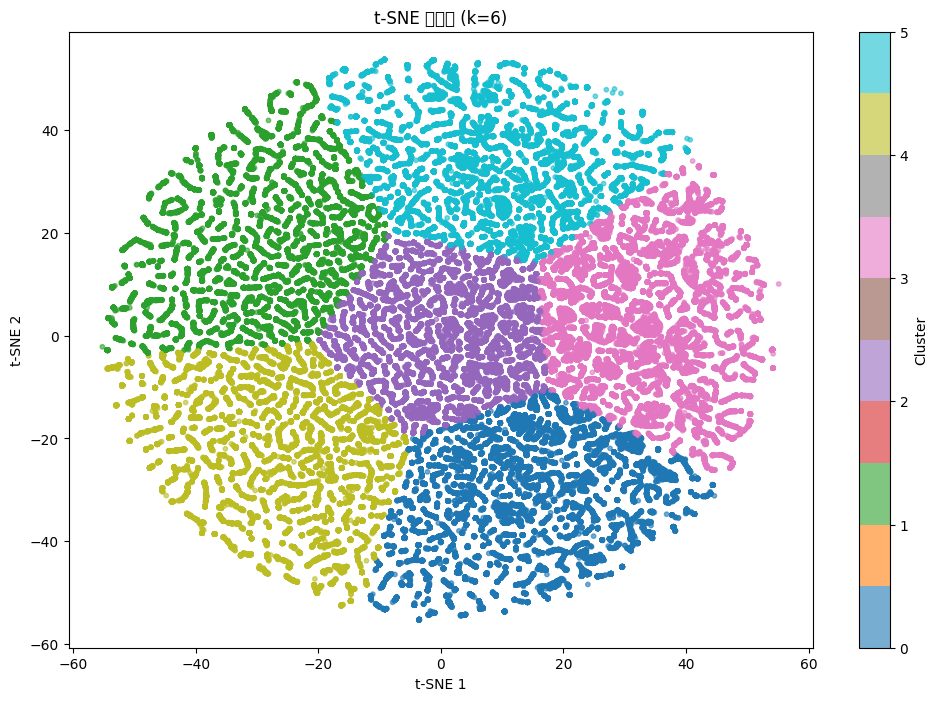


군집별 추천 아이템 수:
Cluster 0: 30개
Cluster 1: 30개
Cluster 2: 30개
Cluster 3: 30개
Cluster 4: 30개
Cluster 5: 30개

모델 저장 완료!

대표적인 군집 프로필:
   cluster   height_cm  weight_kg       size        age  body type
0        0  168.977775  65.710093  13.838696  28.520461  hourglass
1        1  161.485728  53.722230   3.839069  32.094192     petite
2        2  166.658057  61.288945  10.381207  30.975938  hourglass
3        3  169.018555  74.297413  21.667820  32.730733  hourglass
4        4  163.811111  55.194680   4.595477  28.561473  hourglass
5        5  164.791516  63.323363  12.669077  32.753100  hourglass


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

# 1. 데이터 로드 (전체 데이터 사용)
try:
    df = pd.read_csv('../../renttherunway_data.csv')  # 파일 경로 확인 필수
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인해 주세요: ../../renttherunway_data.csv")
    exit()
df = df[(df['age'] >= 20) & (df['age'] < 40)]
print(f"전체 데이터 크기: {df.shape}")

# 2. 전처리 함수
def height_to_cm(height):
    try:
        if pd.isna(height): return np.nan
        feet, inches = height.split("'")
        inches = inches.replace('"', '').strip()
        return int(feet)*30.48 + int(inches)*2.54
    except:
        return np.nan

# 3. 단위 변환 (키/몸무게)
df['height_cm'] = df['height'].apply(height_to_cm)
df['weight_kg'] = df['weight'].astype(str).str.replace('lbs','').str.strip()
df['weight_kg'] = pd.to_numeric(df['weight_kg'], errors='coerce') * 0.453592

# 4. 몸무게-사이즈 상관관계 출력
correlation = df['weight_kg'].corr(df['size'])
print(f"\n몸무게와 사이즈의 상관관계: {correlation:.3f}")

# 5. 결측치 처리 (몸무게는 사이즈별 평균으로만 대체)
# height_cm, size, age는 전체 평균으로 대체
for col in ['height_cm', 'size', 'age']:
    df[col] = df[col].fillna(df[col].mean())

# weight_kg는 사이즈별 평균으로만 대체 (사이즈별 평균이 없는 경우만 전체 평균)
size_weight_mean = df.groupby('size')['weight_kg'].transform('mean')
df['weight_kg'] = df['weight_kg'].fillna(size_weight_mean)

# 만약 size 자체가 결측이거나, 해당 size에 weight_kg 평균이 없는 경우만 전체 평균으로 대체
overall_weight_mean = df['weight_kg'].mean()
df['weight_kg'] = df['weight_kg'].fillna(overall_weight_mean)

# 범주형 변수 처리
df['body type'] = df['body type'].fillna(df['body type'].mode().iloc[0])

# 6. 이상치 제거 (상위 1% 제거)
for col in ['height_cm', 'weight_kg', 'size']:
    df = df[df[col] <= df[col].quantile(0.99)]
print(f"이상치 제거 후 데이터 크기: {df.shape}")

# 7. 나이 그룹화
df['age_group'] = pd.cut(df['age'], bins=[19, 25, 30, 35, 40], 
                         labels=['20-24', '25-29', '30-34', '35-39'])

# 8. 전처리 및 가중치 적용
scaler = MinMaxScaler()
num_features = scaler.fit_transform(df[['height_cm', 'weight_kg', 'size']])

encoder_age = OneHotEncoder(sparse_output=False)
age_encoded = encoder_age.fit_transform(df[['age_group']])
age_weights = np.ones(age_encoded.shape[1]) / age_encoded.shape[1]
age_encoded = age_encoded * age_weights

encoder_body = OneHotEncoder(sparse_output=False)
body_encoded = encoder_body.fit_transform(df[['body type']])
body_weights = np.ones(body_encoded.shape[1]) / body_encoded.shape[1]
body_encoded = body_encoded * body_weights
print(encoder_body.categories_)

final_features = np.hstack([
    num_features,
    age_encoded,
    body_encoded
])

# 9. t-SNE 차원 축소 (전체 데이터는 시간이 오래 걸릴 수 있음)
print("\nt-SNE 차원 축소 시작... (전체 데이터, 시간 소요)")
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, 
            early_exaggeration=12, n_iter=1000, random_state=42)
tsne_features = tsne.fit_transform(final_features)
print("t-SNE 차원 축소 완료!")

# 10. KMeans 클러스터링 (k=6)
k = 6
print(f"\nKMeans 클러스터링 시작 (k={k})...")
kmeans = KMeans(n_clusters=k, n_init=15, random_state=42)
df['cluster'] = kmeans.fit_predict(tsne_features)
print("클러스터링 완료!")

# 11. 실루엣 점수 계산
silhouette = silhouette_score(tsne_features, df['cluster'])
print(f"실루엣 점수 (k={k}): {silhouette:.3f}")

# 12. t-SNE 시각화
plt.figure(figsize=(12,8))
plt.scatter(tsne_features[:,0], tsne_features[:,1], 
            c=df['cluster'], cmap='tab10', alpha=0.6, s=10)
plt.colorbar(ticks=range(k), label='Cluster')
plt.title(f't-SNE 시각화 (k={k})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.savefig(f'kmeans_k{k}_clusters_full.png', dpi=300)
plt.show()

# 13. 군집별 추천
recommendations = {}
for cluster in range(k):
    cluster_data = df[df['cluster'] == cluster]
    recommended_items = cluster_data[
        (cluster_data['fit'] == 'fit') & 
        (cluster_data['rating'] >= 4)
    ]['item_id'].value_counts().index.tolist()
    recommendations[cluster] = recommended_items[:30]

print("\n군집별 추천 아이템 수:")
for cluster, items in recommendations.items():
    print(f"Cluster {cluster}: {len(items)}개")

# 14. 모델 저장
joblib.dump({
    'kmeans': kmeans,
    'scaler': scaler,
    'encoder_age': encoder_age,
    'encoder_body': encoder_body,
    'tsne': tsne,
    'optimal_k': k
}, f'optimal_kmeans_k{k}_model_full.pkl')

print("\n모델 저장 완료!")

# 15. 군집 프로필
cluster_profile = df.groupby('cluster').agg({
    'height_cm': 'mean',
    'weight_kg': 'mean',
    'size': 'mean',
    'age': 'mean',
    'body type': lambda x: x.value_counts().index[0]
}).reset_index()

print("\n대표적인 군집 프로필:")
print(cluster_profile)


각 주성분의 분산 비율: [0.41266231 0.17182532]
누적 분산 비율: [0.41266231 0.58448763]
                PC1       PC2
height_cm  0.273179 -0.153569
weight_kg  0.453205 -0.028093
size       0.839412  0.007897
age_0     -0.015037 -0.007373
age_1     -0.043259 -0.687245
age_2      0.028013  0.708798
age_3      0.030283 -0.014180
body_0     0.010802  0.002661
body_1    -0.009848 -0.009955
body_2     0.025717  0.009163
body_3     0.059217 -0.006853
body_4     0.017661 -0.002897
body_5    -0.079272  0.016840
body_6    -0.024276 -0.008959


C:\Users\user\AppData\Local\Temp\ipykernel_2156\2932242212.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.savefig(f'pca_k{k}_clusters_PCA_full.png', dpi=300)
C:\Users\user\AppData\Local\Temp\ipykernel_2156\2932242212.py:26: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.savefig(f'pca_k{k}_clusters_PCA_full.png', dpi=300)
C:\Users\user\AppData\Local\Temp\ipykernel_2156\2932242212.py:26: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.savefig(f'pca_k{k}_clusters_PCA_full.png', dpi=300)
c:\Users\user\Desktop\toy3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu San

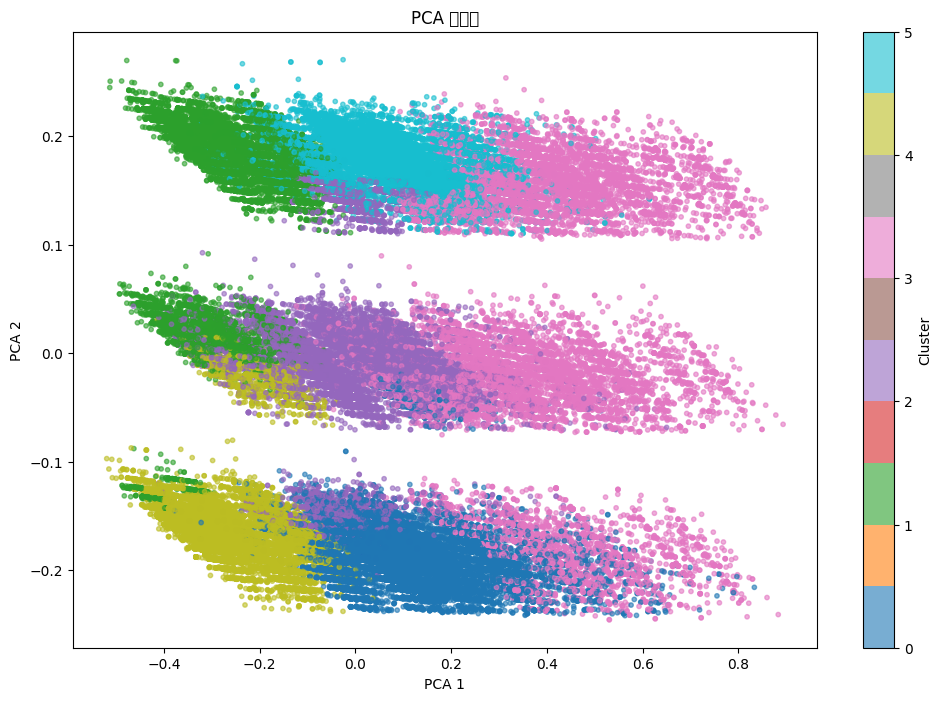

In [3]:
# 13. PCA 시각화 추가 (새로운 코드)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(final_features)

print("각 주성분의 분산 비율:", pca.explained_variance_ratio_)
print("누적 분산 비율:", np.cumsum(pca.explained_variance_ratio_))

# 각 원본 특성이 주성분에 기여하는 정도 확인
components_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(2)],
    index=['height_cm', 'weight_kg', 'size'] + [f'age_{i}' for i in range(4)] + 
          [f'body_{i}' for i in range(body_encoded.shape[1])]
)
print(components_df)

plt.figure(figsize=(12, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], 
            c=df['cluster'], cmap='tab10', alpha=0.6, s=10)
plt.colorbar(ticks=range(k), label='Cluster')
plt.title('PCA 시각화')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig(f'pca_k{k}_clusters_PCA_full.png', dpi=300)
plt.show()


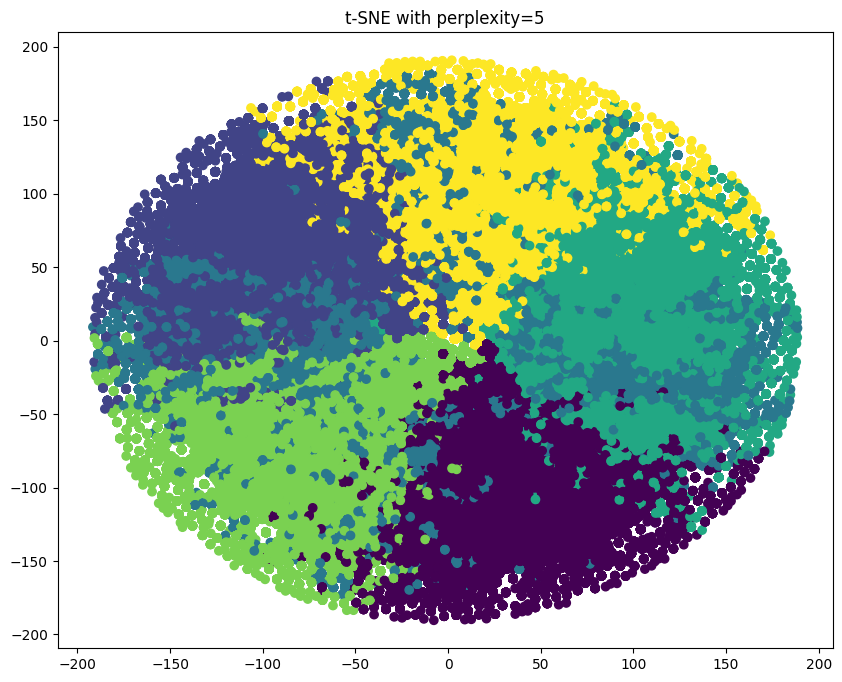

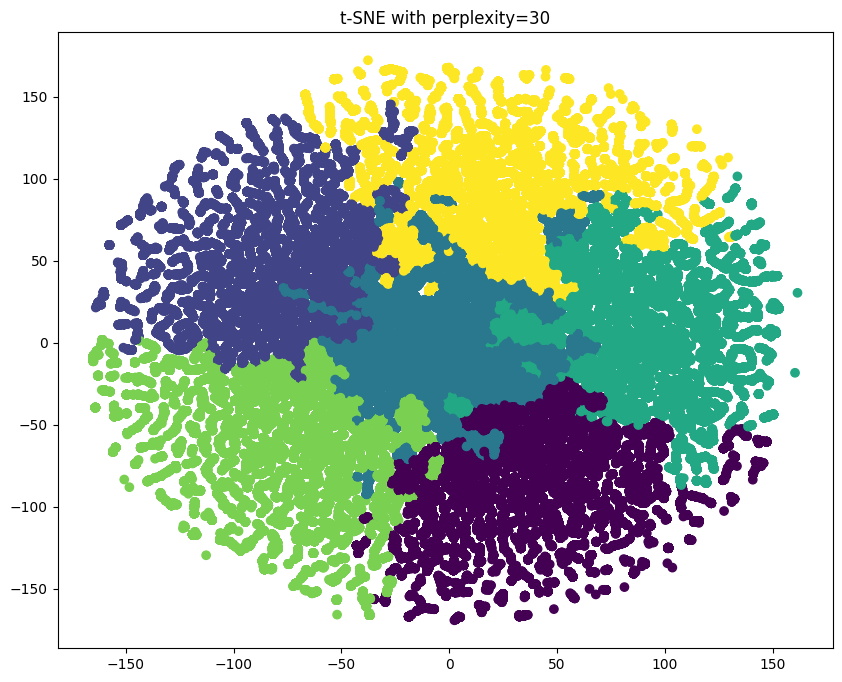

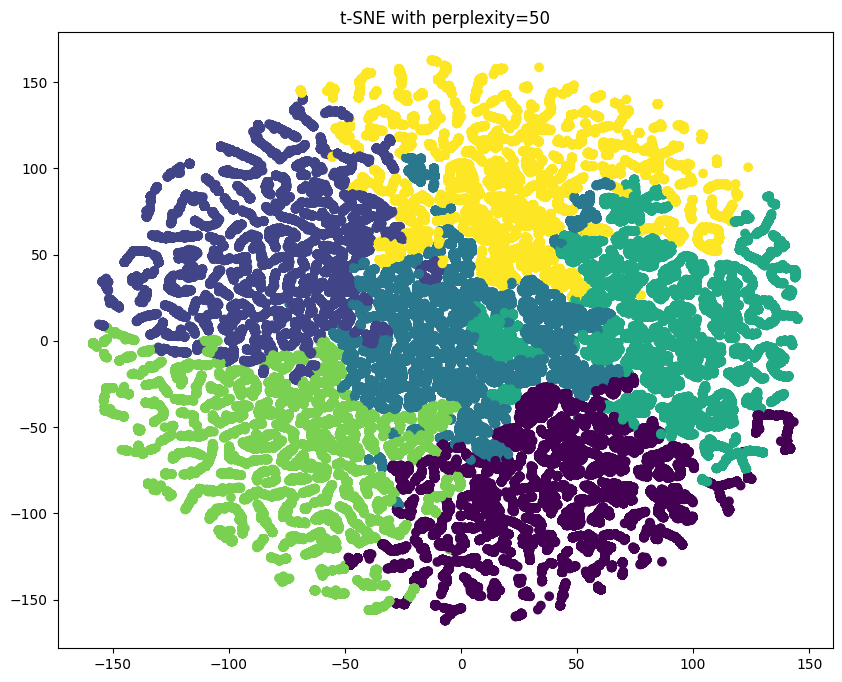

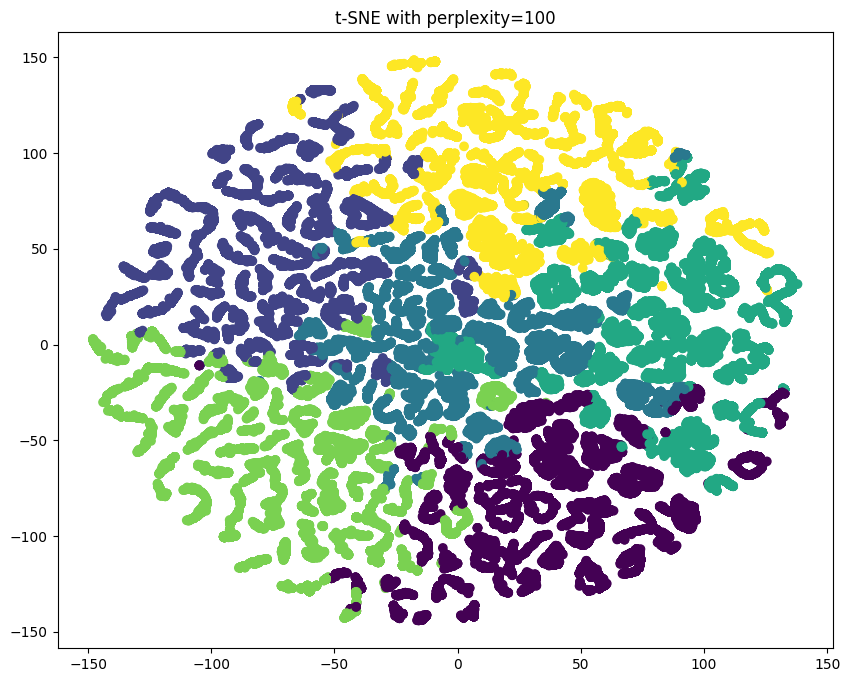

In [4]:
# 다양한 perplexity 값으로 t-SNE 실행하여 세부 특성 파악
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_features = tsne.fit_transform(final_features)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=df['cluster'])
    plt.title(f't-SNE with perplexity={perplexity}')
    plt.show()

In [5]:
# 각 클러스터별 특성 분석
for cluster_id in range(k):
    cluster_data = df[df['cluster'] == cluster_id]
    
    # 주요 특성의 분포 확인
    print(f"\n클러스터 {cluster_id} 특성 (n={len(cluster_data)}):")
    print(f"체형: {cluster_data['body type'].value_counts().head(3)}")
    print(f"나이대: {cluster_data['age_group'].value_counts()}")
    print(f"평균 사이즈: {cluster_data['size'].mean():.2f}")
    print(f"평균 몸무게: {cluster_data['weight_kg'].mean():.2f} kg")


클러스터 0 특성 (n=25610):
체형: body type
hourglass    9336
athletic     7573
pear         4798
Name: count, dtype: int64
나이대: age_group
25-29    25092
35-39      518
20-24        0
30-34        0
Name: count, dtype: int64
평균 사이즈: 13.84
평균 몸무게: 65.71 kg

클러스터 1 특성 (n=24843):
체형: body type
petite       9991
athletic     5896
hourglass    4840
Name: count, dtype: int64
나이대: age_group
30-34    17696
35-39     3515
20-24     3031
25-29      601
Name: count, dtype: int64
평균 사이즈: 3.84
평균 몸무게: 53.72 kg

클러스터 2 특성 (n=25393):
체형: body type
hourglass    8973
athletic     8331
pear         3276
Name: count, dtype: int64
나이대: age_group
35-39    10329
20-24     8917
30-34     4240
25-29     1907
Name: count, dtype: int64
평균 사이즈: 10.38
평균 몸무게: 61.29 kg

클러스터 3 특성 (n=25432):
체형: body type
hourglass    13556
full bust     3853
athletic      3062
Name: count, dtype: int64
나이대: age_group
30-34    11083
35-39     8027
25-29     4241
20-24     2081
Name: count, dtype: int64
평균 사이즈: 21.67
평균 몸무게: 74.30 kg

클러스터 